In [1]:
%cd C:\Users\Sergey\Desktop\QQQ\2_level_\training\Python\temp

C:\Users\Sergey\Desktop\QQQ\2_level_\training\Python\temp


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [63]:
data = pd.read_csv('data_fp.csv')
data.head()

,Title,IC50,SMILES,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,...,bit_id_2038,bit_id_2039,bit_id_2040,bit_id_2041,bit_id_2042,bit_id_2043,bit_id_2044,bit_id_2045,bit_id_2046,bit_id_2047
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,24.0,7.0,9.0,4.0,6.0,10.0,7.0,...,1,0,0,0,0,0,0,0,0,0
1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,21.0,4.0,6.0,4.0,3.0,6.0,7.0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,21.0,3.0,6.0,5.0,2.0,6.0,7.0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,20.0,3.0,6.0,5.0,2.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,24.0,4.0,9.0,6.0,4.0,9.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
from scipy import stats
import matplotlib.pyplot as plt

<Axes: xlabel='IC50', ylabel='Count'>

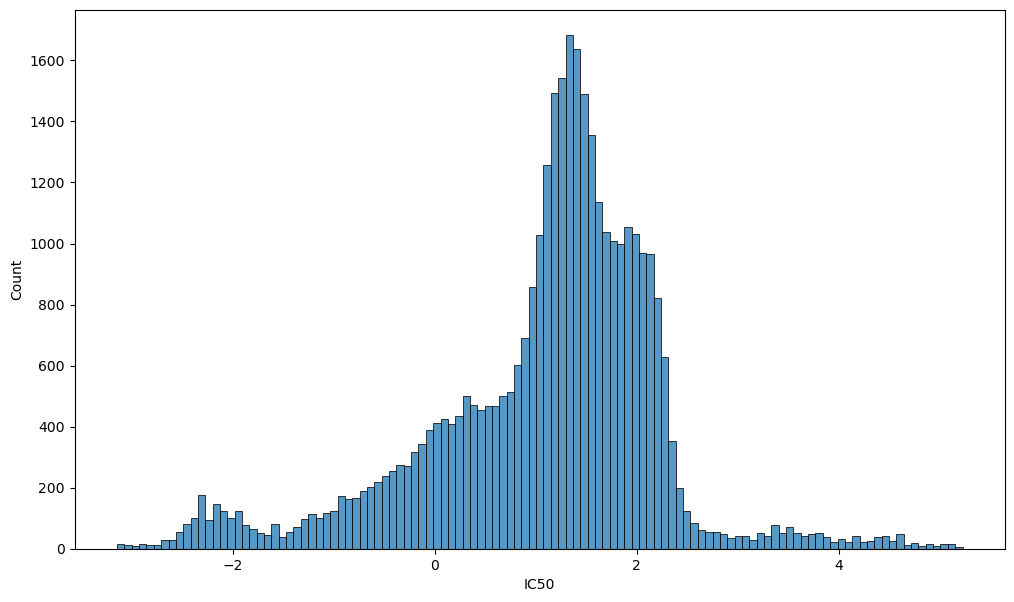

In [68]:
z_scores = stats.zscore(np.log(data['IC50']))
threshold = 3
df_filtered = data[(z_scores > -threshold) & (z_scores < threshold)]

plt.figure(figsize=(12, 7))
sns.histplot(np.log(df_filtered['IC50']))

In [69]:
df_filtered['IC50'] = np.log(df_filtered['IC50'])

C:\Users\Sergey\AppData\Local\Temp\ipykernel_23028\1705288111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['IC50'] = np.log(df_filtered['IC50'])


In [71]:
df_filtered['IC50'].min(), df_filtered['IC50'].max()

(-3.146555163288575, 5.2273904832081)

In [28]:
# X = data_train.drop(['client_id', 'npo_account_id', 'frst_pmnt_date', 'lst_pmnt_date_per_qrtr'], axis=1).reset_index()
# X = X.drop('index', axis=1)
# # y = data_train['churn'].reset_index()
# # y = y.drop('index', axis=1)

In [73]:
X = df_filtered.copy()

In [74]:
X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)

In [75]:
X_train.shape, X_test.shape

((28627, 2066), (7157, 2066))

In [76]:
# X_train.shape, y_train.shape

In [33]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import torch

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
RANDOM_STATE = 42
N_THREADS = 16

np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [79]:
TARGET_NAME = 'IC50'

In [80]:
roles = {
    'target': TARGET_NAME, 
}

In [81]:
def mse_metric(y_true, y_pred, **kwargs):
    return mean_squared_error(y_true, y_pred, **kwargs)

In [82]:
task = Task(
    'reg', # required
    # loss='mse',
    metric=mse_metric
)

In [83]:
N_FOLDS = 2
TIMEOUT = 30 * 60 # 30 minutes

In [84]:
RD = ReportDeco(output_path='report')

In [85]:
automl = TabularUtilizedAutoML(
    task=task, # required
    timeout=TIMEOUT,
    cpu_limit=N_THREADS,
    reader_params={'n_jobs': N_THREADS, 'random_state': RANDOM_STATE}
)

automl_rd = automl

In [86]:
%%time
off_preds = automl_rd.fit_predict(X_train, roles=roles, verbose=1)

[00:50:49] Start automl utilizator with listed constraints:
[00:50:49] - time: 1800.00 seconds
[00:50:49] - CPU: 16 cores
[00:50:49] - memory: 16 GB

[00:50:49] If one preset completes earlier, next preset configuration will be started

[00:50:49] ==================================================
[00:50:49] Start 0 automl preset configuration:
[00:50:49] c:\anaconda3\lib\site-packages\lightautoml\automl\presets\tabular_configs\conf_0_sel_type_0.yml, random state: {'reader_params': {'random_state': 42}, 'nn_params': {'random_state': 42}, 'general_params': {'return_all_predictions': False}}
[00:50:49] Stdout logging level is INFO.
[00:50:49] Task: reg

[00:50:49] Start automl preset with listed constraints:
[00:50:49] - time: 1800.00 seconds
[00:50:49] - CPU: 16 cores
[00:50:49] - memory: 16 GB

[00:50:49] Train data shape: (28627, 2066)

[00:51:59] Layer 1 train process start. Time left 1730.27 secs
[00:52:05] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[00:52:21] Fitting Lvl_0_Pipe_

In [87]:
te_preds = automl_rd.predict(X_test)

In [88]:
# print(roc_auc_score(X_train[TARGET_NAME], off_preds.data[:, 0]))
print(mean_squared_error(X_test[TARGET_NAME], te_preds.data[:, 0]))

0.7640565854231816


In [89]:
print(r2_score(X_test[TARGET_NAME], te_preds.data[:, 0]))

0.4349222497884544


In [90]:
import seaborn as sns

C:\Users\Sergey\AppData\Local\Temp\ipykernel_23028\3389945967.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], palette="deep");


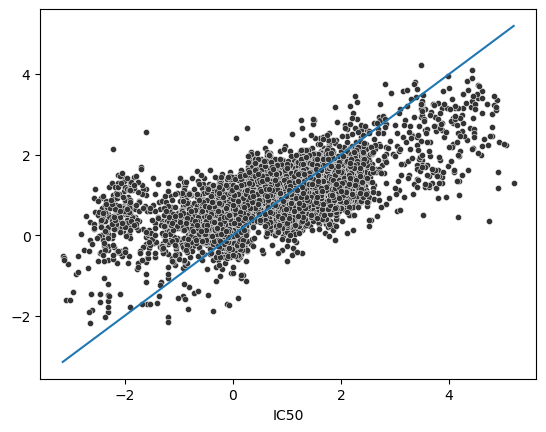

In [91]:
y_test = X_test[TARGET_NAME]
y_pred = te_preds.data[:, 0]
sns.scatterplot(x=y_test, y=y_pred, s=20, color=".2")
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], palette="deep");